In [744]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

# Praktikum Kaggle Machine Learning 

## 1. Prepare Dataset

In [747]:
train = pd.read_csv('Praktikum_2_ML(train).csv')
test = pd.read_csv('Praktikum_2_ML(test).csv')

In [748]:
train.head()

,crash_record_id,tanggal_kecelakaan,longitude,latitude,batas_kecepatan_terpasang,kondisi_perangkat,kondisi_cuaca,kondisi_pencahayaan,jenis_jalan,kondisi_permukaan_jalan,...,penyebab_kecelakaan_utama,penyebab_kecelakaan_lain,cedera_terparah,jumlah_cedera,cedera_fatal,cedera_serius,cedera_tidak_serius,cedera_dilaporkan_tidak_nyata,tidak_ada_indikasi_cedera,kerusakan
0,1bc86617362be59edff39dc8eb3110c8521809fd59975c...,06/01/2018 04:35:00 PM,-87.723019,41.785826,30,NO CONTROLS,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,...,FAILING TO YIELD RIGHT-OF-WAY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,"OVER $1,500"
1,7af6ea16e1773daeab1b4955bd1a2997e22a66133f751d...,02/06/2019 03:30:00 PM,-87.678016,41.924513,30,NO CONTROLS,CLEAR,DARKNESS,NOT DIVIDED,DRY,...,IMPROPER OVERTAKING/PASSING,NOT APPLICABLE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,$500 OR LESS
2,aa7e5680ae512f08cfceac7995088be2f6e6768d4462fb...,06/17/2017 10:05:00 PM,-87.702085,41.946539,30,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",PARKING LOT,UNKNOWN,...,EXCEEDING SAFE SPEED FOR CONDITIONS,EXCEEDING SAFE SPEED FOR CONDITIONS,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,"$501 - $1,500"
3,8868b3d93fce810fb2bb641ef2e6825642e5159f8d608b...,08/09/2023 12:20:00 PM,-87.659829,41.696878,35,NO CONTROLS,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,...,UNABLE TO DETERMINE,UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,$500 OR LESS
4,715439ffa95de3a122edf10654426e7f6ecedcd5398aab...,09/17/2023 04:19:00 PM,-87.774777,41.971278,20,NO CONTROLS,CLEAR,DAYLIGHT,ONE-WAY,DRY,...,UNABLE TO DETERMINE,UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,"OVER $1,500"


In [749]:
test.head()

,crash_record_id,tanggal_kecelakaan,longitude,latitude,batas_kecepatan_terpasang,kondisi_perangkat,kondisi_cuaca,kondisi_pencahayaan,jenis_jalan,kondisi_permukaan_jalan,...,jumlah_unit,penyebab_kecelakaan_utama,penyebab_kecelakaan_lain,cedera_terparah,jumlah_cedera,cedera_fatal,cedera_serius,cedera_tidak_serius,cedera_dilaporkan_tidak_nyata,tidak_ada_indikasi_cedera
0,7fc64afefbe0b7ddb4b862239bb00b30474c5880aa9692...,10/21/2021 04:44:00 PM,-87.667969,41.828538,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,...,2,UNABLE TO DETERMINE,UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,5.0
1,e05550c44b1bb917d6948e0561c990d52b11607d9ba421...,02/12/2017 02:00:00 PM,-87.715250,41.924735,30,NO CONTROLS,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,...,2,UNABLE TO DETERMINE,UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0
2,8401ee2d34d09e704ae1b3945cc7af26e3b2c78683baa3...,11/09/2023 06:30:00 AM,-87.732228,41.755062,20,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKING LOT,DRY,...,2,UNABLE TO DETERMINE,UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0
3,c994fbf4dcae5a709637ce7011fd6fc530128d8e5380d2...,08/29/2018 07:30:00 AM,-87.666837,41.885557,30,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,NOT DIVIDED,DRY,...,2,IMPROPER OVERTAKING/PASSING,FOLLOWING TOO CLOSELY,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0
4,3101344108ca7764420c2360defa432c5ecc91d7f1c2f8...,06/05/2017 08:30:00 PM,-87.686187,41.866655,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NOT DIVIDED,DRY,...,1,ROAD ENGINEERING/SURFACE/MARKING DEFECTS,NOT APPLICABLE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0


## 2. Clearing Dataset

In [751]:
# cek apakah ada nilai Nan pada data 'train'
train.isna().sum()

crash_record_id                  0
tanggal_kecelakaan               0
longitude                        0
latitude                         0
batas_kecepatan_terpasang        0
kondisi_perangkat                0
kondisi_cuaca                    0
kondisi_pencahayaan              0
jenis_jalan                      0
kondisi_permukaan_jalan          0
cacat_jalan                      0
jenis_laporan                    0
jenis_tabrakan_pertama           0
jenis_kecelakaan                 0
jumlah_unit                      0
penyebab_kecelakaan_utama        0
penyebab_kecelakaan_lain         0
cedera_terparah                  0
jumlah_cedera                    0
cedera_fatal                     0
cedera_serius                    0
cedera_tidak_serius              0
cedera_dilaporkan_tidak_nyata    0
tidak_ada_indikasi_cedera        0
kerusakan                        0
dtype: int64

In [752]:
# cek apakah ada duplikat data
train.duplicated().sum()

0

In [753]:
# cek apakah ada nilai NaN pada dataset 'test'
test.isna().sum()

crash_record_id                  0
tanggal_kecelakaan               0
longitude                        0
latitude                         0
batas_kecepatan_terpasang        0
kondisi_perangkat                0
kondisi_cuaca                    0
kondisi_pencahayaan              0
jenis_jalan                      0
kondisi_permukaan_jalan          0
cacat_jalan                      0
jenis_laporan                    0
jenis_tabrakan_pertama           0
jenis_kecelakaan                 0
jumlah_unit                      0
penyebab_kecelakaan_utama        0
penyebab_kecelakaan_lain         0
cedera_terparah                  0
jumlah_cedera                    0
cedera_fatal                     0
cedera_serius                    0
cedera_tidak_serius              0
cedera_dilaporkan_tidak_nyata    0
tidak_ada_indikasi_cedera        0
dtype: int64

In [754]:
# cek apakah ada duplikat
test.duplicated().sum()

0

In [755]:
# cek Unique Value pada dataset
train.nunique()

crash_record_id                  11250
tanggal_kecelakaan               11156
longitude                        10190
latitude                         10190
batas_kecepatan_terpasang           19
kondisi_perangkat                    8
kondisi_cuaca                       11
kondisi_pencahayaan                  6
jenis_jalan                         20
kondisi_permukaan_jalan              7
cacat_jalan                          7
jenis_laporan                        3
jenis_tabrakan_pertama              17
jenis_kecelakaan                     2
jumlah_unit                          8
penyebab_kecelakaan_utama           39
penyebab_kecelakaan_lain            40
cedera_terparah                      5
jumlah_cedera                        7
cedera_fatal                         2
cedera_serius                        4
cedera_tidak_serius                  7
cedera_dilaporkan_tidak_nyata        6
tidak_ada_indikasi_cedera           15
kerusakan                            3
dtype: int64

setelah melakukan Clearing data, bisa kita lihat data sudah bersih karena tidak mengandung nilai `NaN`, `duplikasi`, dan `Unique value` yang beragam

## 3. EDA

In [758]:
train.describe()

,longitude,latitude,batas_kecepatan_terpasang,jumlah_unit,jumlah_cedera,cedera_fatal,cedera_serius,cedera_tidak_serius,cedera_dilaporkan_tidak_nyata,tidak_ada_indikasi_cedera
count,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000
mean,-87.653972,41.848897,28.165067,2.011200,0.166933,0.000444,0.018489,0.094311,0.053689,1.966044
std,1.432811,0.688929,6.263075,0.394489,0.489420,0.021078,0.150902,0.371073,0.274817,1.126895
min,-87.905309,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-87.719382,41.787208,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-87.671269,41.876697,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,-87.633000,41.925263,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,0.000000,42.022660,99.000000,8.000000,6.000000,1.000000,3.000000,6.000000,5.000000,34.000000


In [759]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crash_record_id                11250 non-null  object 
 1   tanggal_kecelakaan             11250 non-null  object 
 2   longitude                      11250 non-null  float64
 3   latitude                       11250 non-null  float64
 4   batas_kecepatan_terpasang      11250 non-null  int64  
 5   kondisi_perangkat              11250 non-null  object 
 6   kondisi_cuaca                  11250 non-null  object 
 7   kondisi_pencahayaan            11250 non-null  object 
 8   jenis_jalan                    11250 non-null  object 
 9   kondisi_permukaan_jalan        11250 non-null  object 
 10  cacat_jalan                    11250 non-null  object 
 11  jenis_laporan                  11250 non-null  object 
 12  jenis_tabrakan_pertama         11250 non-null 

In [760]:
# Memisahkan kolom numerik dan kategorikal
col_obj = train.select_dtypes(include=['object']).columns.tolist()
col_num = train.select_dtypes(include=['number']).columns.tolist()

In [761]:
train_obj = train[col_obj]
train_obj.head().T

,0,1,2,3,4
crash_record_id,1bc86617362be59edff39dc8eb3110c8521809fd59975c...,7af6ea16e1773daeab1b4955bd1a2997e22a66133f751d...,aa7e5680ae512f08cfceac7995088be2f6e6768d4462fb...,8868b3d93fce810fb2bb641ef2e6825642e5159f8d608b...,715439ffa95de3a122edf10654426e7f6ecedcd5398aab...
tanggal_kecelakaan,06/01/2018 04:35:00 PM,02/06/2019 03:30:00 PM,06/17/2017 10:05:00 PM,08/09/2023 12:20:00 PM,09/17/2023 04:19:00 PM
kondisi_perangkat,NO CONTROLS,NO CONTROLS,UNKNOWN,NO CONTROLS,NO CONTROLS
kondisi_cuaca,CLEAR,CLEAR,UNKNOWN,CLEAR,CLEAR
kondisi_pencahayaan,DAYLIGHT,DARKNESS,"DARKNESS, LIGHTED ROAD",DAYLIGHT,DAYLIGHT
jenis_jalan,NOT DIVIDED,NOT DIVIDED,PARKING LOT,NOT DIVIDED,ONE-WAY
kondisi_permukaan_jalan,DRY,DRY,UNKNOWN,DRY,DRY
cacat_jalan,NO DEFECTS,NO DEFECTS,UNKNOWN,NO DEFECTS,NO DEFECTS
jenis_laporan,NOT ON SCENE (DESK REPORT),NOT ON SCENE (DESK REPORT),NOT ON SCENE (DESK REPORT),NOT ON SCENE (DESK REPORT),ON SCENE
jenis_tabrakan_pertama,TURNING,SIDESWIPE SAME DIRECTION,ANGLE,SIDESWIPE SAME DIRECTION,PARKED MOTOR VEHICLE


In [762]:
train_num = train[col_num]
train_num.head().T

,0,1,2,3,4
longitude,-87.723019,-87.678016,-87.702085,-87.659829,-87.774777
latitude,41.785826,41.924513,41.946539,41.696878,41.971278
batas_kecepatan_terpasang,30.000000,30.000000,30.000000,35.000000,20.000000
jumlah_unit,2.000000,2.000000,2.000000,2.000000,2.000000
jumlah_cedera,0.000000,0.000000,0.000000,0.000000,0.000000
cedera_fatal,0.000000,0.000000,0.000000,0.000000,0.000000
cedera_serius,0.000000,0.000000,0.000000,0.000000,0.000000
cedera_tidak_serius,0.000000,0.000000,0.000000,0.000000,0.000000
cedera_dilaporkan_tidak_nyata,0.000000,0.000000,0.000000,0.000000,0.000000
tidak_ada_indikasi_cedera,2.000000,2.000000,2.000000,2.000000,1.000000


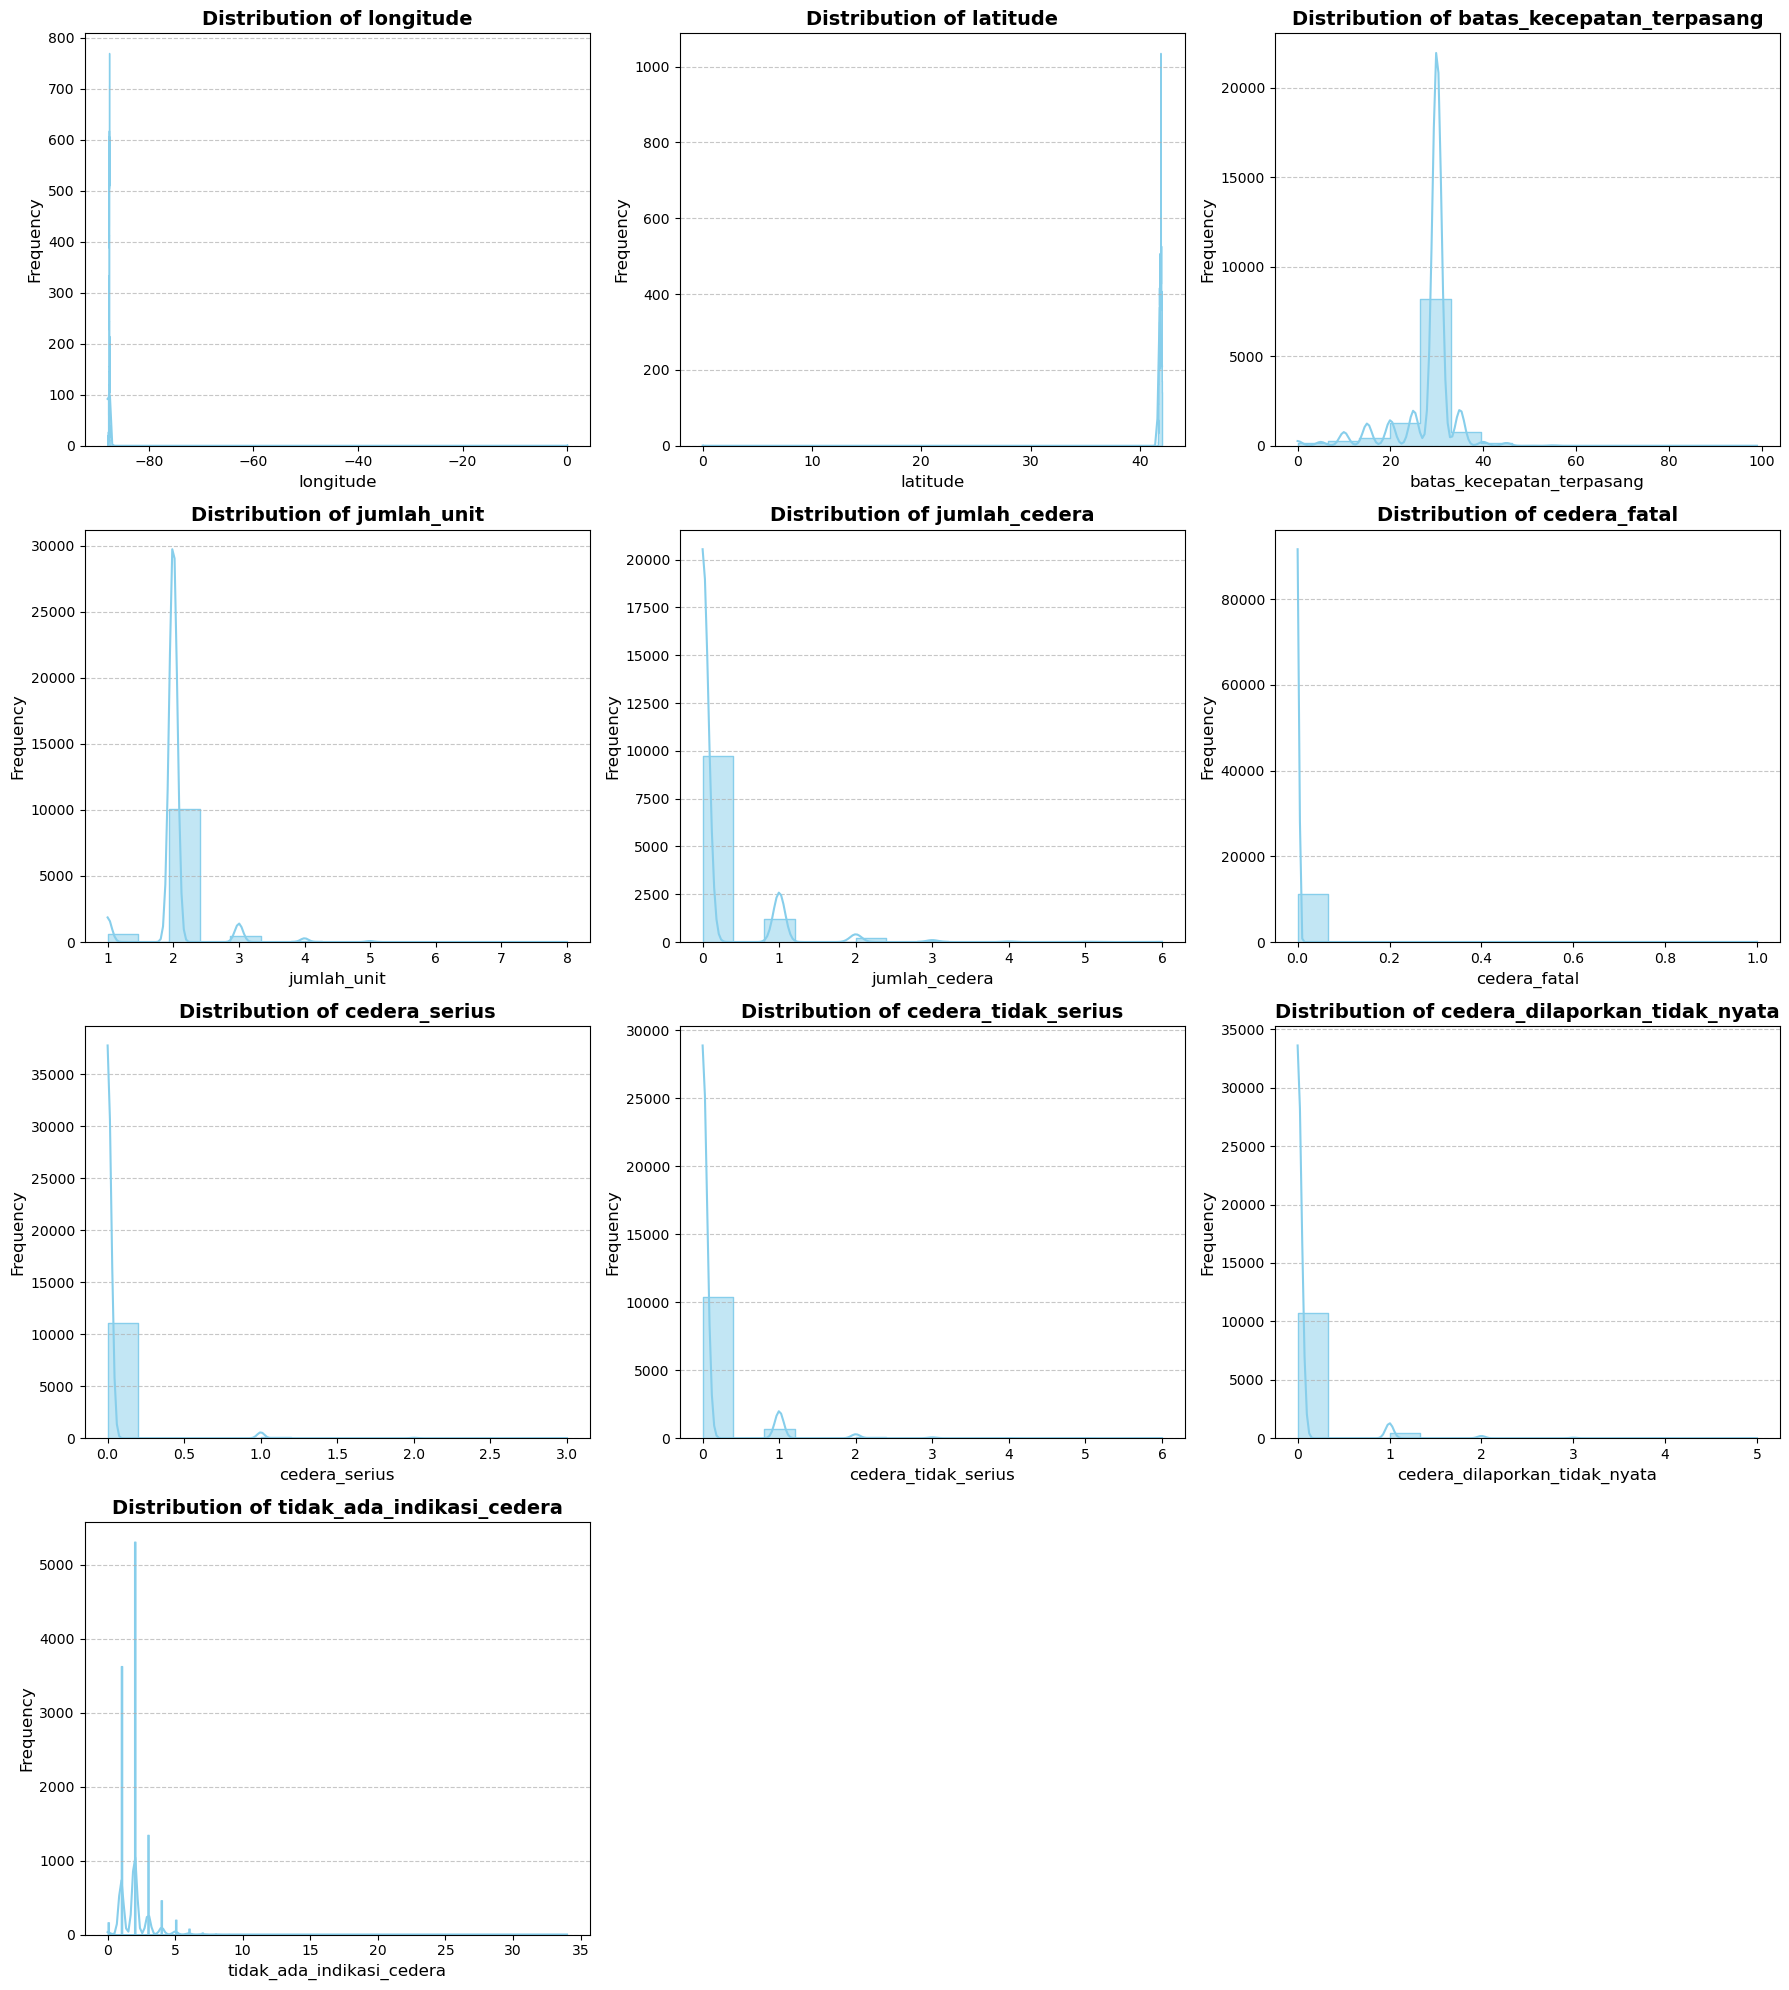

In [763]:
# Visualisasikan Distribusi kolom numerik
n_cols = 3
n_rows = (len(train_num.columns) // n_cols) + 1

# Mengatur ukuran figure
plt.figure(figsize=(18, n_rows * 5))

# Membuat visualisasi histogram untuk setiap kolom dalam train_num
for i, column in enumerate(train_num.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=train_num, x=column, kde=True, color='skyblue', element='step')
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mengatur layout agar tidak overlapping
plt.tight_layout()
plt.show()

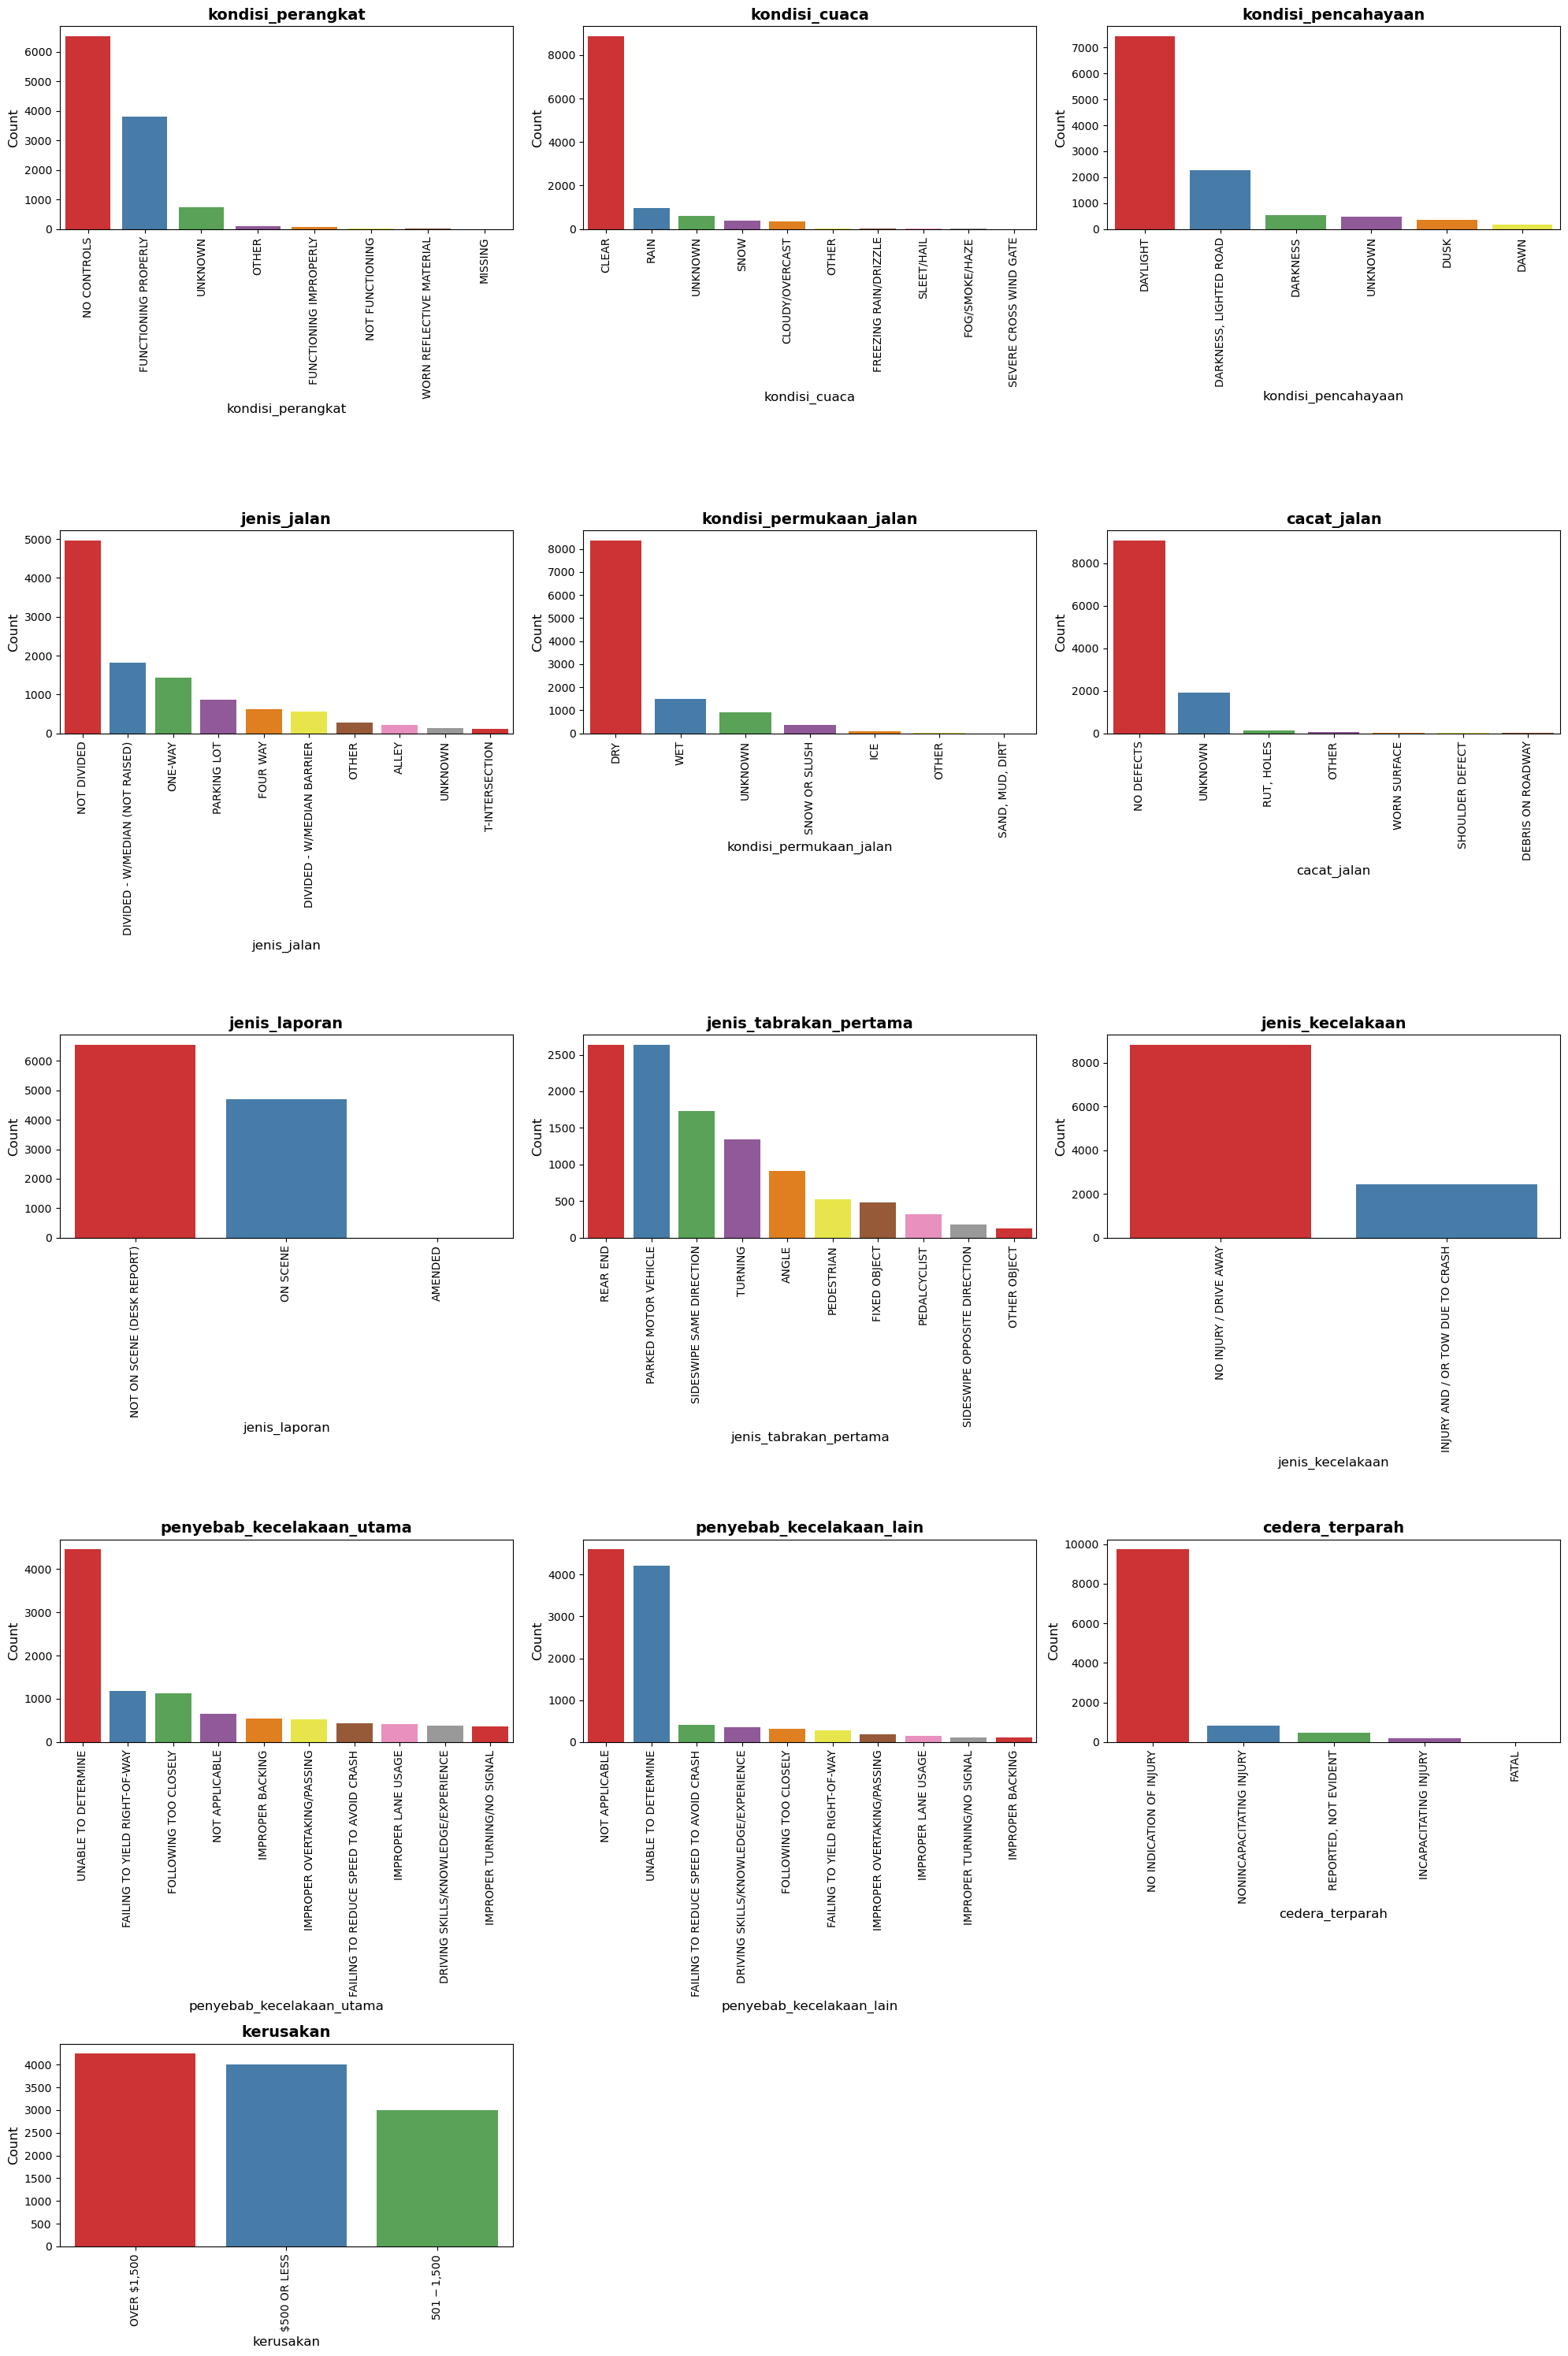

In [764]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Menonaktifkan warning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Memilih kolom kategorikal selain 'tanggal_kecelakaan' dan 'crash_record_id'
columns_to_plot = [col for col in train_obj.columns if col not in ['tanggal_kecelakaan', 'crash_record_id']]

# Definisi jumlah kolom dan baris
n_cols = 3
n_rows = (len(columns_to_plot) // n_cols) + 1

# Mengatur ukuran figure
plt.figure(figsize=(20, n_rows * 6))

# Membuat countplot untuk setiap kolom kategorikal dalam train_obj
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Mengambil 10 nilai teratas dari kolom
    top_10_items = train_obj[column].value_counts().nlargest(10).index
    
    # Memfilter data hanya dengan nilai-nilai yang ada dalam top 10
    filtered_df = train_obj[train_obj[column].isin(top_10_items)]
    
    # Membuat countplot
    sns.countplot(data=filtered_df, x=column, palette='Set1', order=top_10_items)
    plt.title(column, fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Mengatur rotasi label x jika jumlah kategori terlalu banyak
    plt.xticks(rotation=90)

# Mengatur layout agar tidak overlapping
plt.tight_layout()
plt.show()

## 4. Preprocessing Data

Convert data menggunakan `map` pada kolom `kerusakan`

In [767]:
# Mapping manual untuk kolom 'kerusakan'
mapping_kerusakan = {
    'OVER $1,500': 2,
    '$501 - $1,500': 1,
    '$500 OR LESS': 0
}

# Terapkan mapping ke kolom 'kerusakan'
train['kerusakan'] = train['kerusakan'].map(mapping_kerusakan)

In [768]:
train.kerusakan.value_counts()

kerusakan
2    4250
0    4000
1    3000
Name: count, dtype: int64

In [769]:
# cek data
train_unknown = train[train.kondisi_permukaan_jalan == 'UNKNOWN']
train_unknown.head()

,crash_record_id,tanggal_kecelakaan,longitude,latitude,batas_kecepatan_terpasang,kondisi_perangkat,kondisi_cuaca,kondisi_pencahayaan,jenis_jalan,kondisi_permukaan_jalan,...,penyebab_kecelakaan_utama,penyebab_kecelakaan_lain,cedera_terparah,jumlah_cedera,cedera_fatal,cedera_serius,cedera_tidak_serius,cedera_dilaporkan_tidak_nyata,tidak_ada_indikasi_cedera,kerusakan
2,aa7e5680ae512f08cfceac7995088be2f6e6768d4462fb...,06/17/2017 10:05:00 PM,-87.702085,41.946539,30,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",PARKING LOT,UNKNOWN,...,EXCEEDING SAFE SPEED FOR CONDITIONS,EXCEEDING SAFE SPEED FOR CONDITIONS,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,1
21,34246af2da71bd59376c72573588d80aef894ce9f804c0...,10/22/2021 04:02:00 PM,-87.644328,41.755996,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NOT DIVIDED,UNKNOWN,...,UNABLE TO DETERMINE,NOT APPLICABLE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0
23,e17ff250e164426140777107193be1746a8c869ddd138c...,09/27/2023 05:20:00 PM,-87.661924,41.903316,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,FOUR WAY,UNKNOWN,...,UNABLE TO DETERMINE,NOT APPLICABLE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,2
40,ac1e1f72f847a0dffddb773baa0ece1ab125e3abf53412...,05/15/2020 05:25:00 PM,-87.660615,41.885217,30,NO CONTROLS,CLEAR,DAYLIGHT,NOT DIVIDED,UNKNOWN,...,IMPROPER OVERTAKING/PASSING,IMPROPER OVERTAKING/PASSING,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,1
48,39c772280145313bbbdf65bbcbc428f1c836c562b3c944...,03/13/2022 11:30:00 AM,-87.749790,41.880330,15,NO CONTROLS,UNKNOWN,UNKNOWN,PARKING LOT,UNKNOWN,...,UNABLE TO DETERMINE,UNABLE TO DETERMINE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,2


Notice bahwa ada data yang bernama `UNKNOWN`, saya akan menggunakakan modus untuk mengisi nilai `UNKNWON` tesebut

In [822]:
# Penanganan pada data 'train'
for col in train.columns:
    if 'UNKNOWN' in train[col].values:
        # Menghitung modus kolomk
        modus = train[col].mode()[0]
        # Mengganti nilai 'UNKNOWN' dengan modus
        train[col] = train[col].replace('UNKNOWN', modus)

In [824]:
# Penanganan pada data 'test'
for col in test.columns:
    if 'UNKNOWN' in test[col].values:
        # Menghitung modus kolomk
        modus = test[col].mode()[0]
        # Mengganti nilai 'UNKNOWN' dengan modus
        test[col] = test[col].replace('UNKNOWN', modus)

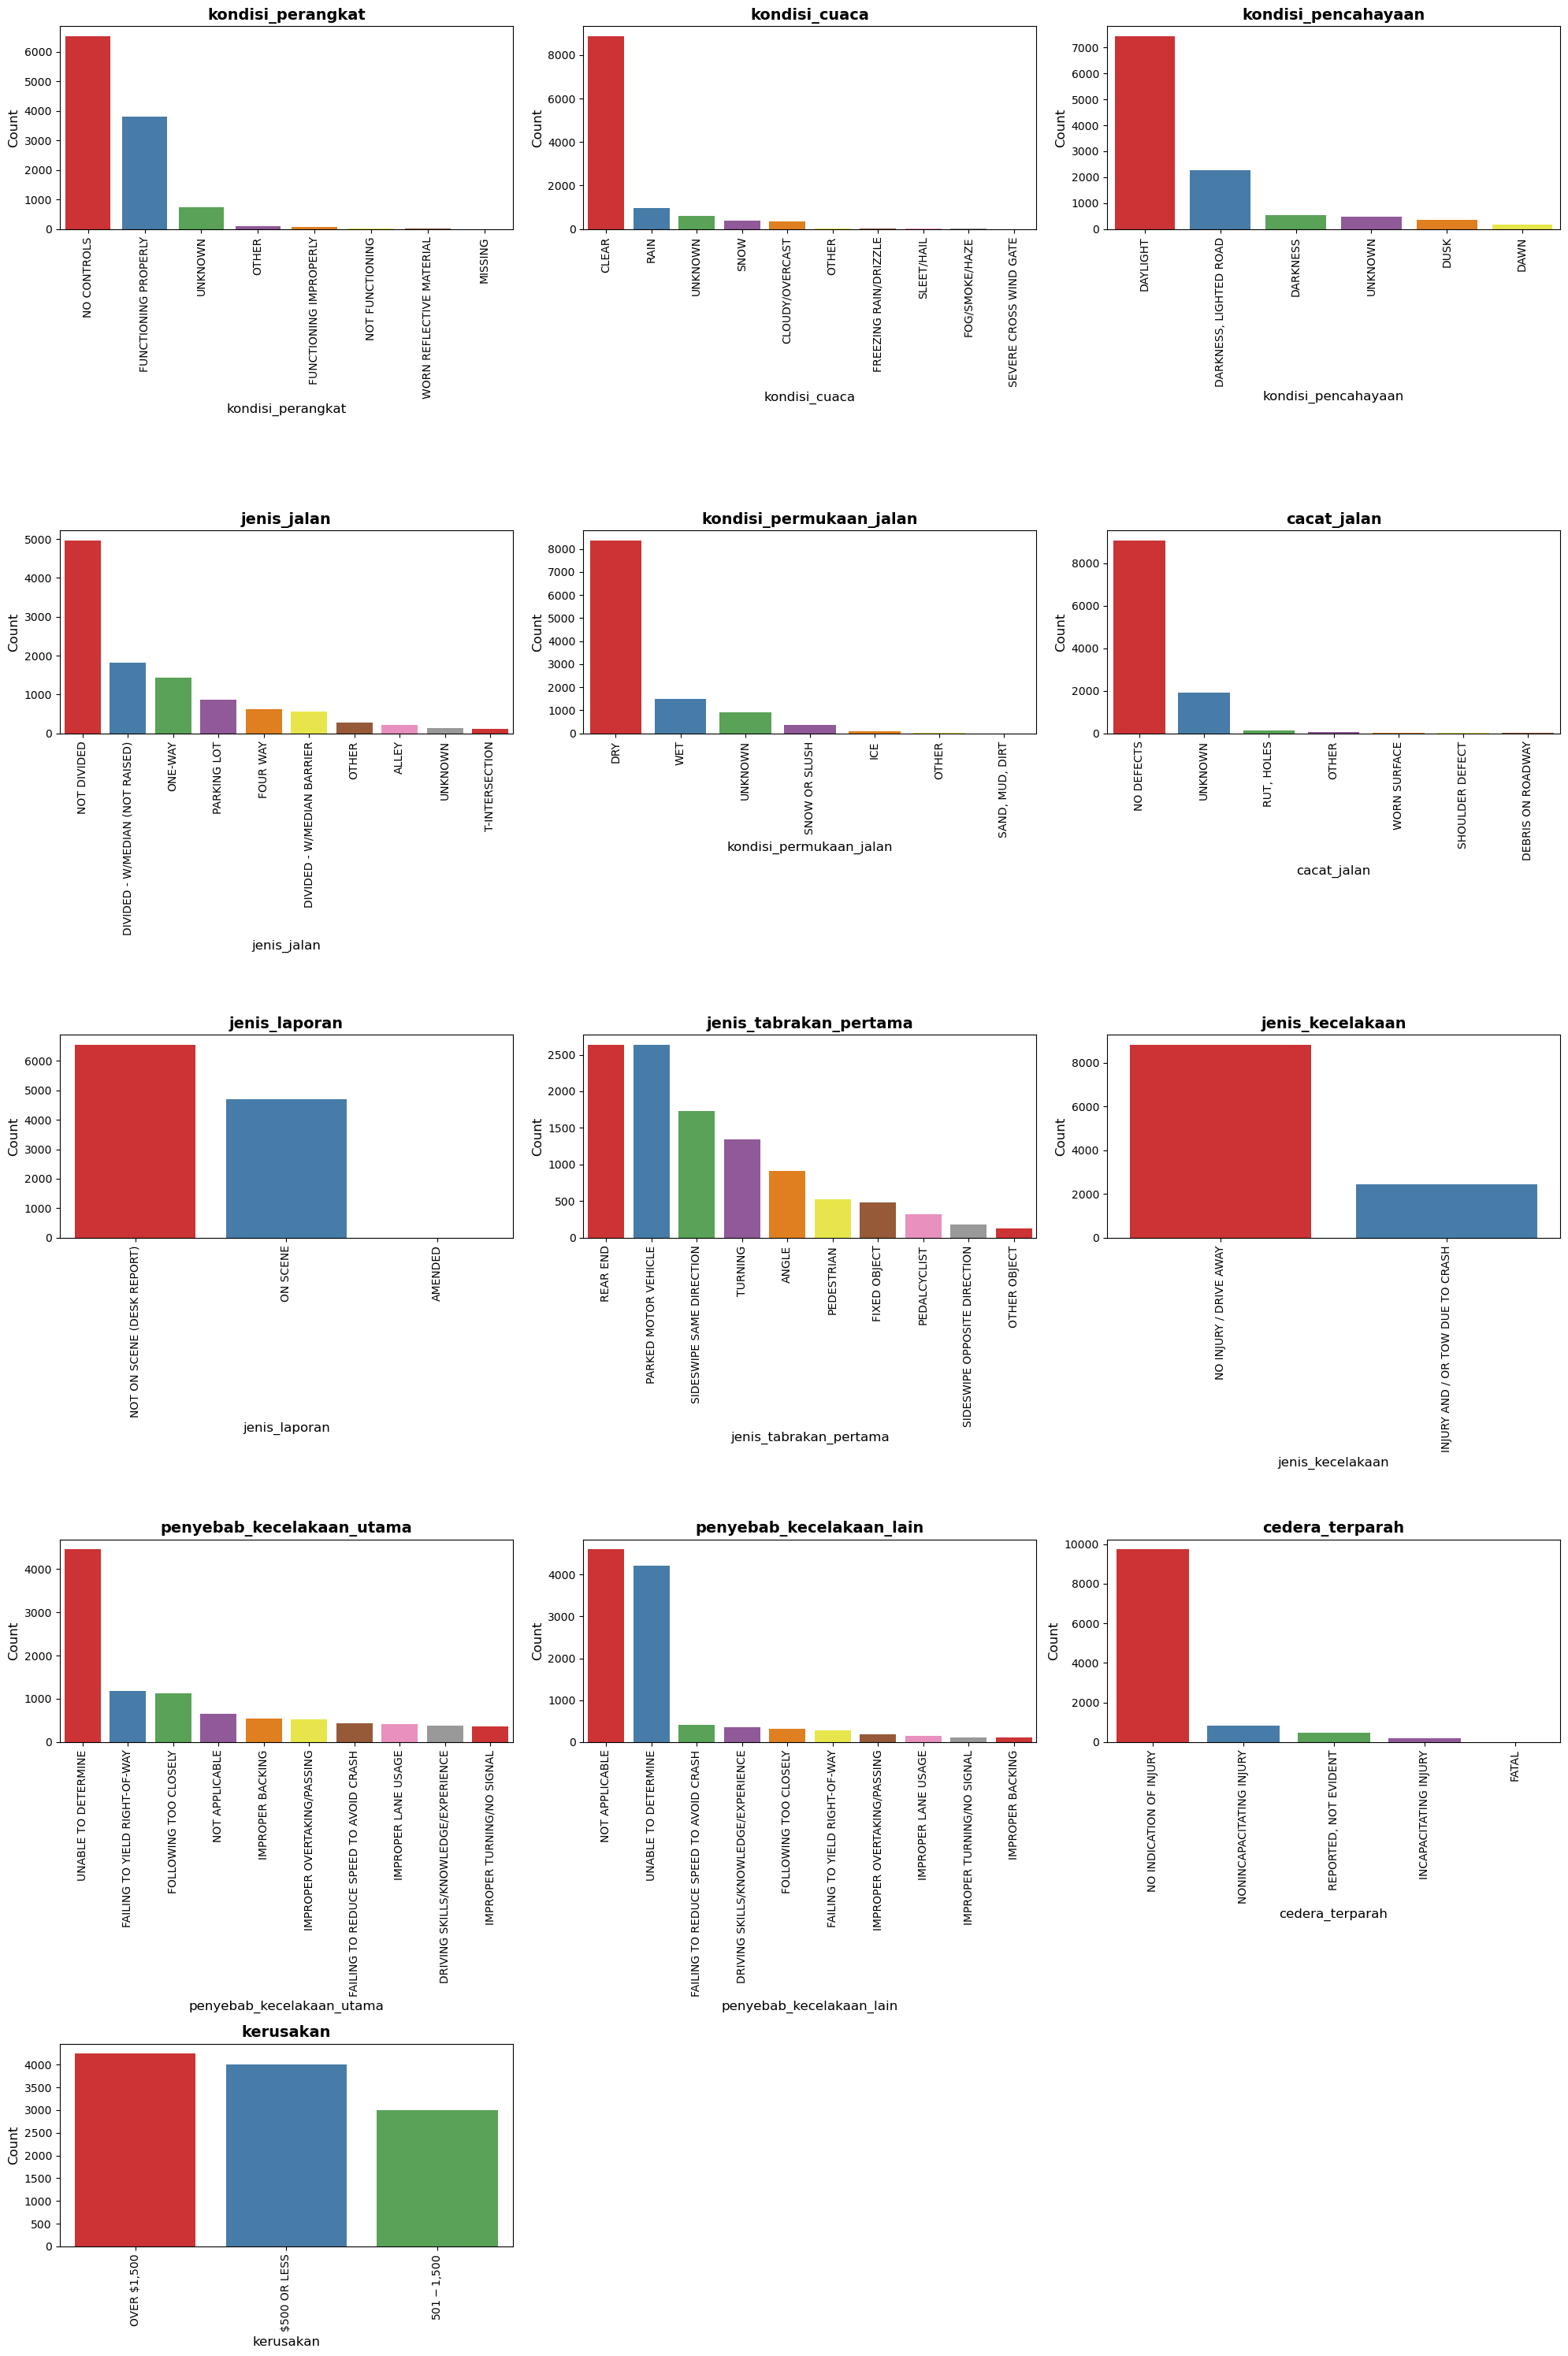

In [872]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Menonaktifkan warning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Memilih kolom kategorikal selain 'tanggal_kecelakaan' dan 'crash_record_id'
columns_to_plot = [col for col in train_obj.columns if col not in ['tanggal_kecelakaan', 'crash_record_id']]

# Definisi jumlah kolom dan baris
n_cols = 3
n_rows = (len(columns_to_plot) // n_cols) + 1

# Mengatur ukuran figure
plt.figure(figsize=(20, n_rows * 6))

# Membuat countplot untuk setiap kolom kategorikal dalam train_obj
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Mengambil 10 nilai teratas dari kolom
    top_10_items = train_obj[column].value_counts().nlargest(10).index
    
    # Memfilter data hanya dengan nilai-nilai yang ada dalam top 10
    filtered_df = train_obj[train_obj[column].isin(top_10_items)]
    
    # Membuat countplot
    sns.countplot(data=filtered_df, x=column, palette='Set1', order=top_10_items)
    plt.title(column, fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Mengatur rotasi label x jika jumlah kategori terlalu banyak
    plt.xticks(rotation=90)

# Mengatur layout agar tidak overlapping
plt.tight_layout()
plt.show()

Selanjutnya kita akan convert data `categorical` menjadi `numerik` agar data dapat di olah dengan model menggunakan `LabelEncoder`

In [828]:
# Convert pada data 'train'
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for column in train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    # Fit dan transform kolom
    train[column] = le.fit_transform(train[column])
    # Simpan encoder untuk digunakan nanti (jika diperlukan)
    label_encoders[column] = le

In [830]:
# Cnvert pada data 'test'
for column in test.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    # Fit dan transform kolom
    test[column] = le.fit_transform(test[column])
    # Simpan encoder untuk digunakan nanti (jika diperlukan)
    label_encoders[column] = le

# 5. Modelling

Dari hasil `EDA` di atas, bisa dilihat bahwa data tidak **`BALANCE`**, karena itu saya menggunakan **`SMOTE`** untuk menangani **`IMBALANCE`**

In [838]:
from imblearn.over_sampling import SMOTE

X = train.drop('kerusakan', axis=1)
y = train['kerusakan']

# Inisialisasi SMOTE
smote = SMOTE(random_state=55)

# Terapkan SMOTE pada data latih
X_smote, y_smote = smote.fit_resample(X, y)

Untuk model yang saya gunakan adalah CatboostClassifier

**CatBoost** adalah salah satu algoritma machine learning berbasis gradient boosting yang dikembangkan oleh Yandex, sebuah perusahaan teknologi di Rusia. CatBoost sangat cocok untuk menangani data kategorikal dan merupakan singkatan dari "Categorical Boosting." Algoritma ini dirancang khusus untuk bekerja dengan baik dengan fitur kategorikal dan memberikan beberapa keunggulan dibanding algoritma boosting lainnya, seperti XGBoost dan LightGBM.

**Kenapa CatBoost?**
1. **Ordered Boosting:** Menggunakan Ordered Boosting untuk menghindari overfitting, membuatnya lebih stabil pada dataset kecil atau tidak seimbang.
2. **Efisiensi dan Kecepatan:** Dirancang untuk efisiensi tinggi dan cepat, terutama untuk dataset besar dan kategorikal.
3. **Dukungan untuk Heterogeneous Data:** Bekerja dengan baik untuk data campuran (numerik dan kategorikal), membuatnya lebih fleksibel.

In [832]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(random_state=42)
cat.fit(X_smote,y_smote)

Learning rate set to 0.090096
0:	learn: 1.0811919	total: 8.2ms	remaining: 8.19s
1:	learn: 1.0699047	total: 17.4ms	remaining: 8.71s
2:	learn: 1.0591542	total: 24.1ms	remaining: 8.02s
3:	learn: 1.0508496	total: 30.1ms	remaining: 7.5s
4:	learn: 1.0428072	total: 36.4ms	remaining: 7.25s
5:	learn: 1.0342575	total: 42.8ms	remaining: 7.08s
6:	learn: 1.0253011	total: 49.3ms	remaining: 6.99s
7:	learn: 1.0203204	total: 55.5ms	remaining: 6.88s
8:	learn: 1.0167765	total: 61.7ms	remaining: 6.79s
9:	learn: 1.0127057	total: 68.2ms	remaining: 6.75s
10:	learn: 1.0102177	total: 74.3ms	remaining: 6.68s
11:	learn: 1.0052785	total: 80.3ms	remaining: 6.61s
12:	learn: 1.0022248	total: 88ms	remaining: 6.68s
13:	learn: 0.9989388	total: 93.8ms	remaining: 6.61s
14:	learn: 0.9935433	total: 102ms	remaining: 6.69s
15:	learn: 0.9916410	total: 108ms	remaining: 6.64s
16:	learn: 0.9896280	total: 114ms	remaining: 6.62s
17:	learn: 0.9862742	total: 122ms	remaining: 6.63s
18:	learn: 0.9849367	total: 128ms	remaining: 6.63s
1

# 6. Evaluasi Model

In [842]:
from sklearn.metrics import classification_report

In [854]:
# Menghasilkan classification report untuk data pelatihan
y_pred = cat.predict(X_smote)

print(classification_report(y_smote, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      4250
           1       0.80      0.80      0.80      4250
           2       0.83      0.78      0.80      4250

    accuracy                           0.80     12750
   macro avg       0.80      0.80      0.80     12750
weighted avg       0.80      0.80      0.80     12750



### Membuat Submission 

In [856]:
# lakukan Prediksi pada data test
y_pred = cat.predict(test)

In [877]:
# Mapping manual untuk encoding kolom 'kerusakan'
mapping_kerusakan = {
    'OVER $1,500': 2,
    '$501 - $1,500': 1,
    '$500 OR LESS': 0
}

# Balikkan mapping untuk pengembalian hasil prediksi
inverse_mapping_kerusakan = {v: k for k, v in mapping_kerusakan.items()}

In [860]:
y_pred = pd.Series(y_pred.ravel()).map(inverse_mapping_kerusakan)

In [862]:
sub = pd.read_csv('Praktikum_2_ML(test).csv')

In [864]:
submission = pd.DataFrame({
    "crash_record_id": sub["crash_record_id"],
    "kerusakan": y_pred
})
submission.head()

,crash_record_id,kerusakan
0,7fc64afefbe0b7ddb4b862239bb00b30474c5880aa9692...,$500 OR LESS
1,e05550c44b1bb917d6948e0561c990d52b11607d9ba421...,"$501 - $1,500"
2,8401ee2d34d09e704ae1b3945cc7af26e3b2c78683baa3...,"$501 - $1,500"
3,c994fbf4dcae5a709637ce7011fd6fc530128d8e5380d2...,"$501 - $1,500"
4,3101344108ca7764420c2360defa432c5ecc91d7f1c2f8...,"$501 - $1,500"


In [866]:
submission.kerusakan.value_counts()

kerusakan
$501 - $1,500    2406
$500 OR LESS      975
OVER $1,500       369
Name: count, dtype: int64

In [885]:
submission.to_csv('submitt.csv',index = False)

# Tuning Hyper parameter menggunakan `Optuna`

In [870]:
import optuna
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),  # Batasan iterasi lebih kecil
        'depth': trial.suggest_int('depth', 4, 8),  # Kedalaman lebih kecil untuk mempercepat
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),  # Rentang lebih sempit
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 5),  # Rentang lebih kecil
        'random_strength': trial.suggest_loguniform('random_strength', 1e-5, 1),  # Mengurangi rentang
        'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.1, 0.5),  # Rentang lebih sempit
        'border_count': trial.suggest_int('border_count', 32, 128),  # Mengurangi jumlah nilai yang dicoba
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli']),
    }

    if params['bootstrap_type'] != 'Bayesian':
        del params['bagging_temperature']  # Remove bagging_temperature for non-Bayesian bootstrap types

    model = CatBoostClassifier(**params, random_state=42, verbose=0)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()  # Mengurangi CV untuk mempercepat

    return score


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Mengurangi jumlah trial

print("Best Hyperparameters: ", study.best_params)
print("Best Accuracy: ", study.best_value)

catboostbest = CatBoostClassifier(**study.best_params, random_state=42)
catboostbest.fit(X_train, y_train)

y_pred = catboostbest.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

[I 2024-10-03 17:18:49,320] A new study created in memory with name: no-name-5f4a4928-e304-4b4e-b3d3-f26daec74198
[I 2024-10-03 17:18:58,603] Trial 0 finished with value: 0.5310924369747899 and parameters: {'iterations': 197, 'depth': 7, 'learning_rate': 0.017642542545588762, 'l2_leaf_reg': 0.8967943081655954, 'random_strength': 0.030158624726455533, 'bagging_temperature': 0.1069203756332276, 'border_count': 38, 'bootstrap_type': 'Bernoulli'}. Best is trial 0 with value: 0.5310924369747899.
[I 2024-10-03 17:19:13,252] Trial 1 finished with value: 0.5369187675070028 and parameters: {'iterations': 163, 'depth': 8, 'learning_rate': 0.0418059670537242, 'l2_leaf_reg': 3.762024060753703, 'random_strength': 0.06417270322492383, 'bagging_temperature': 0.2761538502314502, 'border_count': 38, 'bootstrap_type': 'Bernoulli'}. Best is trial 1 with value: 0.5369187675070028.
[I 2024-10-03 17:19:27,149] Trial 2 finished with value: 0.5303081232492998 and parameters: {'iterations': 244, 'depth': 7, 'l

Best Hyperparameters:  {'iterations': 479, 'depth': 8, 'learning_rate': 0.03681332240656156, 'l2_leaf_reg': 0.3633538316176049, 'random_strength': 9.124755951235694e-05, 'bagging_temperature': 0.4017373263290923, 'border_count': 78, 'bootstrap_type': 'Bayesian'}
Best Accuracy:  0.5405042016806723
0:	learn: 1.0884432	total: 32.1ms	remaining: 15.3s
1:	learn: 1.0791343	total: 65.5ms	remaining: 15.6s
2:	learn: 1.0706833	total: 97.9ms	remaining: 15.5s
3:	learn: 1.0629383	total: 129ms	remaining: 15.4s
4:	learn: 1.0558262	total: 163ms	remaining: 15.4s
5:	learn: 1.0492777	total: 195ms	remaining: 15.4s
6:	learn: 1.0433179	total: 226ms	remaining: 15.2s
7:	learn: 1.0377840	total: 263ms	remaining: 15.5s
8:	learn: 1.0323107	total: 294ms	remaining: 15.4s
9:	learn: 1.0274545	total: 326ms	remaining: 15.3s
10:	learn: 1.0228110	total: 363ms	remaining: 15.5s
11:	learn: 1.0186470	total: 397ms	remaining: 15.5s
12:	learn: 1.0146143	total: 428ms	remaining: 15.4s
13:	learn: 1.0108626	total: 465ms	remaining: 1

### Membuat Submission dari data Tunning Hyperparameter

In [875]:
y_pred_tuning = catboostbest.predict(test)

In [879]:
y_pred_tuning = pd.Series(y_pred_tuning.ravel()).map(inverse_mapping_kerusakan)

In [881]:
submission = pd.DataFrame({
    "crash_record_id": sub["crash_record_id"],
    "kerusakan": y_pred_tuning
})
submission.head()

,crash_record_id,kerusakan
0,7fc64afefbe0b7ddb4b862239bb00b30474c5880aa9692...,$500 OR LESS
1,e05550c44b1bb917d6948e0561c990d52b11607d9ba421...,"$501 - $1,500"
2,8401ee2d34d09e704ae1b3945cc7af26e3b2c78683baa3...,"$501 - $1,500"
3,c994fbf4dcae5a709637ce7011fd6fc530128d8e5380d2...,"$501 - $1,500"
4,3101344108ca7764420c2360defa432c5ecc91d7f1c2f8...,"$501 - $1,500"


In [883]:
submission.kerusakan.value_counts()

kerusakan
$501 - $1,500    2254
$500 OR LESS     1038
OVER $1,500       458
Name: count, dtype: int64

# Selesai Dan Terimakasih !! ^^